# TinyGraph Basics Walkthrough

This walkthrough will demonstrate the basic functionality of TinyGraph, and show the most important features and algorithms.

In [1]:
import numpy as np
import networkx as nx

import tinygraph as tg

TinyGraph is a package that uses numpy arrays, so we recommend importing numpy in order to get the most out of TinyGraph. Networkx is also useful as it interfaces well with TinyGraph and has additional features.

Setting up a graph can be done simply by initializing the number of vertices in the graph. By default, edge weights are floats, and can be assigned as shown here.

In [3]:
vertex_n = 10
g = tg.TinyGraph(vertex_n)

g[0,1] = 2.7
g[3,4] = 3.1

print(g.node_N)
print(g.edge_N)

10
2


TinyGraph also supports vertex and edge properties. Properties, including edge weight types can be of any type. However, they will be stored in numpy array, so using numpy types can improve performance. Edge and vertex properties can be accessed using .e and .v, respectively. Edge weights, edge properties, and vertex properties are all given default 0 values on initialization, where the default 0 for booleans is False and for strings it is an empty string.

In [23]:
g = tg.TinyGraph(vertex_n,adj_type=np.int32,vp_types={'color': np.int32,
                                                      'is_special': np.bool},
                                            ep_types={'width': np.int32})

g[0,1] = 1
g[3,4] = 2

g.v['is_special'][5] = True
g.v['color'][:] = 10

g.e['width'][3,4] = 4

print(g)

Vertices:
0: {'color': 10, 'is_special': False}
1: {'color': 10, 'is_special': False}
2: {'color': 10, 'is_special': False}
3: {'color': 10, 'is_special': False}
4: {'color': 10, 'is_special': False}
5: {'color': 10, 'is_special': True}
6: {'color': 10, 'is_special': False}
7: {'color': 10, 'is_special': False}
8: {'color': 10, 'is_special': False}
9: {'color': 10, 'is_special': False}

Edges:
(0, 1): Weight - 1, Props - {'width': 0}
(3, 4): Weight - 2, Props - {'width': 4}


Attempting to access or set edge properties for edges that do not exist will throw an error.

In [24]:
g.e['width'][2,8] = 12

IndexError: No such edge.

We also have simple functions for looping over the edges and vertices, given a list of properties to return. The properties will be returned in a map for each edge or vertex. For each edge, the weight can also be returned, if the parameter is passed as True.

In [26]:
for e1, e2, w, props in g.edges(True, ['width']):
    print(e1, e2, w, props['width'])

0 1 1 0
3 4 2 4


In [27]:
for v, props in g.vertices(['color','is_special']):
    if props['is_special']:
        print(v, props['color'])

5 10


There are other functions for making copies, getting a vertex's neighbors and adding or removing vertices, edge properties or vertex properties. Edges can be removed by setting their weight to 0. 

# Working with Networkx

Networkx has an extensive library of graph functions, including for generating and displaying graphs. TinyGraph provides easy interface with networkx to take advantage of those functions.

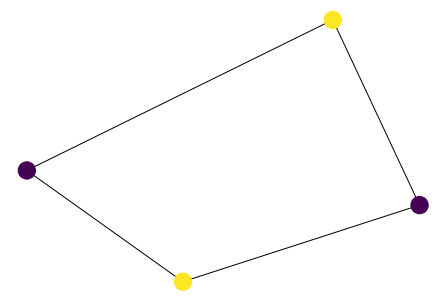

In [8]:
ng = nx.generators.classic.cycle_graph(4) 
ng.graph['name'] = "Cycle" 
ng.nodes[0]['color'] = 0
ng.nodes[1]['color'] = 1
ng.nodes[2]['color'] = 0 
ng.nodes[3]['color'] = 1 
ng.edges[0, 1]['weight'] = 1
ng.edges[1, 2]['weight'] = 2
ng.edges[2, 3]['weight'] = 3
ng.edges[3, 0]['weight'] = 4

node_colors = [0, 1, 0, 1] 
nx.draw(ng, node_color=node_colors)

In [9]:
print(ng.nodes.data()) 
print(ng.edges.data())

[(0, {'color': 0}), (1, {'color': 1}), (2, {'color': 0}), (3, {'color': 1})]
[(0, 1, {'weight': 1}), (0, 3, {'weight': 4}), (1, 2, {'weight': 2}), (2, 3, {'weight': 3})]


Using TinyGraph's to and from networkx functions, we can get translate between networkx and TinyGraph accurately.

In [10]:
g = tg.io.from_nx(ng, name_prop='name', vp_types={'color': np.int}) 
print(g.adjacency)
print(g)

[[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 0. 1. 0.]]
Vertices:
0: {'color': 0, 'name': '0'}
1: {'color': 1, 'name': '1'}
2: {'color': 0, 'name': '2'}
3: {'color': 1, 'name': '3'}

Edges:
(0, 1): Weight - 1.0, Props - {}
(0, 3): Weight - 1.0, Props - {}
(1, 2): Weight - 1.0, Props - {}
(2, 3): Weight - 1.0, Props - {}


In [11]:
print(tg.io.to_nx(g, name_prop='name').nodes.data())

[('0', {'color': 0}), ('1', {'color': 1}), ('2', {'color': 0}), ('3', {'color': 1})]


# Working with RDKit

TinyGraph was developed with the intention of being used as a way to perform graph algorithms on molecules. We therefore provide easy interfacing with RDKit, including to and from the RDKit molecules.

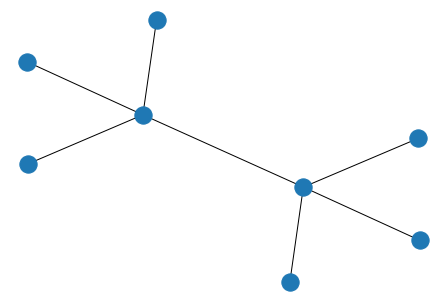

In [12]:
from rdkit import Chem 
import tinygraph.io.rdkit

mol = Chem.MolFromSmiles('CC')
mol = Chem.AddHs(mol)
g = tg.io.rdkit.from_rdkit_mol(mol, use_charge=True, use_chiral=True) 
nx.draw(tg.io.to_nx(g))

In [13]:
new_mol = tg.io.rdkit.to_rdkit_mol(g, charge_prop='charge',chiral_prop='chiral')
new_smiles = Chem.MolToSmiles(new_mol) 
print(new_smiles)

[H]C([H])([H])C([H])([H])[H]


# Algorithms

TinyGraph implements its own version of common graph algorithms which are efficient on the small, undirected, self-loop free graphs we use.

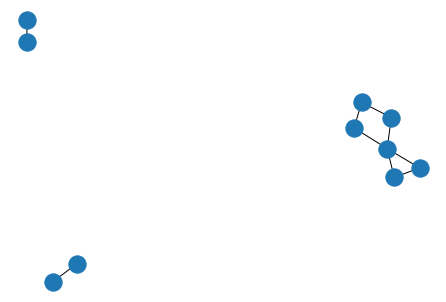

In [8]:
g[1,2] = 2
g[0,2] = 1
g[0,3] = 1
g[4,5] = 1
g[0,5] = 4
g[6,7] = 1
g[8,9] = 2
netx = to_nx(g)
nx.draw(netx)

Using this small graph, we demonstrate our connected components, minimum cycles and shortest paths algorithms. 

The connected components are returned as a list of components, with each component represented by a set containing the vertices in that component.

In [9]:
print(algs.get_connected_components(g))

[{0, 1, 2, 3, 4, 5}, {6, 7}, {8, 9}]

The minimum cycles algorithm calculates the smallest cycle that each vertex is a part of. It returns the cycles as set of each vertex in the cycle. It returns a list of cycles, indexed by vertex, so that the 0th element of the list corresponds to vertex 0. 

In [10]:
print(algs.get_min_cycles(g))

[{0, 1, 2},
 {0, 1, 2},
 {0, 1, 2},
 {0, 3, 4, 5},
 {0, 3, 4, 5},
 {0, 3, 4, 5},
 set(),
 set(),
 set(),
 set()]

Shortest paths similarly returns a list, indexed by vertex. Each element of the list is another list, again indexed by vertex, and the elements are the length of the shortest path between the two vertices. The length of the path can be calculated using the weights of the edges or not. 

In [11]:
sp_w = algs.get_shortest_paths(g, True)
sp_uw = algs.get_shortest_paths(g, False)

print(sp_uw[0][5])
print(sp_w[0][5])

1.0
4.0


# Saving and Loading TinyGraphs

TinyGraph has functions for saving and loading graphs to and from binary. The expectation is that there may be datasets containing millions of graphs. TinyGraph's io has been benchmarked for strong space and time performance on saving and loading. 

In [14]:
import io
outbuf = io.BytesIO()
tg.io.to_binary(g, outbuf)
s = outbuf.getvalue() # mostly not human-readable but great for writing to disk! 
print(s)

b'PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\x00\x00\xd31\x19[\x00\x00\x00\x80\x01\x00\x00\r\x00\x14\x00adjacency.npy\x01\x00\x10\x00\x80\x01\x00\x00\x00\x00\x00\x00[\x00\x00\x00\x00\x00\x00\x00\x9b\xec\x17\xea\x1b\x10\xc9\xc8P\xc6P\xad\x9e\x92Z\x9c\\\xa4n\xa5\xa0n\x93f\xa2\xae\xa3\xa0\x9e\x96_TR\x94\x98\x17\x9f_\x94\x92\n\x12wK\xcc)N\x05\x8a\x17g$\x16\xa4\x02\xf9\x1a\x16:\n\x16\x9a:\n\xb5\nd\x03.\x060h\xb0G\xc5\xc8\x00\x9dOH=6\xb5\x94\xc8S\xc3\x0c\xdc\xf2\x00PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\x00#E\x0c\x96I\x00\x00\x00\x88\x00\x00\x00\x0f\x00\x14\x00vp_atomicno.npy\x01\x00\x10\x00\x88\x00\x00\x00\x00\x00\x00\x00I\x00\x00\x00\x00\x00\x00\x00\x9b\xec\x17\xea\x1b\x10\xc9\xc8P\xc6P\xad\x9e\x92Z\x9c\\\xa4n\xa5\xa0^Sj\xa8\xae\xa3\xa0\x9e\x96_TR\x94\x98\x17\x9f_\x94\x92\n\x12wK\xcc)N\x05\x8a\x17g$\x16\xa4\x02\xf9\x1a\x16:\x9a:\n\xb5\n\x14\x00.66F0\x00\x00PK\x03\x04\x14\x00\x00\x00\x08\x00\x00\x00!\x00\xa9\xdc\xed\xfaG\x00\x00\x00\x88\x00\x00\x00\r\x00\x14\x00vp_charge.npy\x01\x00\x

In [15]:
inbuf = io.BytesIO(s)
g2 = tg.io.from_binary(inbuf) 
print(g2)

Vertices:
0: {'atomicno': 6, 'charge': 0, 'chiral': 0}
1: {'atomicno': 6, 'charge': 0, 'chiral': 0}
2: {'atomicno': 1, 'charge': 0, 'chiral': 0}
3: {'atomicno': 1, 'charge': 0, 'chiral': 0}
4: {'atomicno': 1, 'charge': 0, 'chiral': 0}
5: {'atomicno': 1, 'charge': 0, 'chiral': 0}
6: {'atomicno': 1, 'charge': 0, 'chiral': 0}
7: {'atomicno': 1, 'charge': 0, 'chiral': 0}

Edges:
(0, 1): Weight - 1.0, Props - {}
(0, 2): Weight - 1.0, Props - {}
(0, 3): Weight - 1.0, Props - {}
(0, 4): Weight - 1.0, Props - {}
(1, 5): Weight - 1.0, Props - {}
(1, 6): Weight - 1.0, Props - {}
(1, 7): Weight - 1.0, Props - {}


# Extra Utilities: Permute, Subgraph, and Merge

Lastly, TinyGraph provides graph utility functions for ease of use. This includes graph equality, permuting graphs, taking subgraphs and merging graphs.

To permute a graph, pass any map from the old vertices to the new vertices. Permute returns a new graph, translating over the edges, weights and properties from the original. 

In [16]:
perm = {0: 5, 1: 2, 2:1, 3: 7, 4:0, 5: 6, 6: 4, 7: 3} 
# 0 -> 5, 1->2, etc.
g_permuted = tg.util.permute(g, perm) 
print(g_permuted)

Vertices:
0: {'atomicno': 1, 'charge': 0, 'chiral': 0}
1: {'atomicno': 1, 'charge': 0, 'chiral': 0}
2: {'atomicno': 6, 'charge': 0, 'chiral': 0}
3: {'atomicno': 1, 'charge': 0, 'chiral': 0}
4: {'atomicno': 1, 'charge': 0, 'chiral': 0}
5: {'atomicno': 6, 'charge': 0, 'chiral': 0}
6: {'atomicno': 1, 'charge': 0, 'chiral': 0}
7: {'atomicno': 1, 'charge': 0, 'chiral': 0}

Edges:
(0, 5): Weight - 1.0, Props - {}
(1, 5): Weight - 1.0, Props - {}
(2, 3): Weight - 1.0, Props - {}
(2, 4): Weight - 1.0, Props - {}
(2, 5): Weight - 1.0, Props - {}
(2, 6): Weight - 1.0, Props - {}
(5, 7): Weight - 1.0, Props - {}


Subgraph takes in an iterable and returns a new graph with only the provided vertices, reindexed by their position on the iterable. Edges and properties are again brought over.

In [17]:
just_carbons = set([0, 1])
g_c = tg.util.subgraph(g, just_carbons) 
print(g_c)

Vertices:
0: {'atomicno': 6, 'charge': 0, 'chiral': 0}
1: {'atomicno': 6, 'charge': 0, 'chiral': 0}

Edges:
(0, 1): Weight - 1.0, Props - {}


Lastly, merge combines two graphs, putting the first graph's vertices as the first vertices. Edges and properties are maintained where possible, with default values put in if a property is not present in one of the graphs. When collisions occur, priority is given to the first graph, such as if the adjacency matrix data types are different.

In [19]:
g_both = tg.util.merge(g_c, g) 
print(g_both)

Vertices:
0: {'atomicno': 6, 'charge': 0, 'chiral': 0}
1: {'atomicno': 6, 'charge': 0, 'chiral': 0}
2: {'atomicno': 6, 'charge': 0, 'chiral': 0}
3: {'atomicno': 6, 'charge': 0, 'chiral': 0}
4: {'atomicno': 1, 'charge': 0, 'chiral': 0}
5: {'atomicno': 1, 'charge': 0, 'chiral': 0}
6: {'atomicno': 1, 'charge': 0, 'chiral': 0}
7: {'atomicno': 1, 'charge': 0, 'chiral': 0}
8: {'atomicno': 1, 'charge': 0, 'chiral': 0}
9: {'atomicno': 1, 'charge': 0, 'chiral': 0}

Edges:
(0, 1): Weight - 1.0, Props - {}
(2, 3): Weight - 1.0, Props - {}
(2, 4): Weight - 1.0, Props - {}
(2, 5): Weight - 1.0, Props - {}
(2, 6): Weight - 1.0, Props - {}
(3, 7): Weight - 1.0, Props - {}
(3, 8): Weight - 1.0, Props - {}
(3, 9): Weight - 1.0, Props - {}
